# Especialização em Inteligência Artificial – IFMG
# Trabalho da disciplina de Redes Neurais e Aprendizado Profundo
Autor: Alexandre Fortes Santana

Professor: Agnaldo José da Rocha Reis - UFOP

### 1. O que é inteligência para você?

Para mim, inteligência poderia ser definida pelos tópicos a seguir:
- Inteligência se manifesta em diferentes graus e tipos;
- Inteligência se desenvolve em um indivíduo, a princípio, biológico;
- O indivíduo detentor de inteligência em questão precisa ter a capacidade de memorizar informações em alguma escala;
- O indivíduo detentor de inteligência utiliza as informações a que tem acesso para interpretar o mundo a sua volta e a si mesmo;
- O indivíduo detentor de inteligência é capaz de decisões, agir e criar novos artefatos (imaginários ou físicos).

### 2. Em sua opinião, o que aconteceria se alguém descobrisse como implementar uma IA mais abrangente (e.g., AGI) em um robô?
A descoberta de uma Inteligência Artificial Geral seria um marco histórico para a humanidade. Experimentaríamos um período de frenesi nas redes sociais, nos noticiários e nas rodas de conversa. Muitos dilemas seriam discutidos, abordando temas como mercado de trabalho, impacto social, segurança, regulação, ética e questões militares. Os primeiros robôs focariam em demonstrar o potencial de suas aplicações e em realizar apresentações que alimentassem o frenesi público. Após um período marcado por medo, especulações e empolgação, veríamos as primeiras aplicações práticas direcionadas a problemas reais. Os primeiros robôs comerciais seriam mais simples, devido ao elevado custo de produção, e não necessariamente seriam humanoides. Não, não acredito que as máquinas se revoltariam, levando a um apocalipse.

### 3. Análise de um processo de destilação fracionada de petróleo
A partir da análise de um processo de destilação fracionada de petróleo observou-se que determinado óleo poderia ser classificado em duas classes de pureza {C1 e C2}, mediante a medição de três grandezas {x1, x2 e x3} que representam algumas das propriedades físico-químicas do óleo. Para tanto, pretende-se utilizar um perceptron para executar a classificação automática dessas duas classes. Assim, baseadas nas informações coletadas do processo, formou-se o conjunto de treinamento em anexo (vou te passar a estrutura de dados nas próximas mensagens), tomando por convenção o valor –1 para óleo pertencente à classe C1 e o valor +1 para óleo pertencente à classe C2.

**a. Execute dois treinamentos para a rede perceptron, inicializando-se o vetor de pesos em cada treinamento com valores aleatórios entre zero e um de tal forma que os elementos do vetor de pesos iniciais não sejam os mesmos.**

In [246]:
import numpy as np
import pandas as pd

data = np.loadtxt('tab_treinamento1.dat')
training_data = data[:, :3]
labels = data[:, 3]

# Bias: Adicionando uma coluna de uns ao conjunto de dados de treinamento
training_data = np.c_[np.ones(training_data.shape[0]), training_data]

epochs = 1000
learning_rate = 0.1

# Inicialização de pesos
def initialize_weights(dim):
    return np.random.rand(dim)

# Treinamento do Perceptron
def train_perceptron(training_data, labels, learning_rate, epochs):
    # Inicialização de pesos
    weights = initialize_weights(training_data.shape[1])
    initial_weights = np.copy(weights)
    no_errors = 0
    final_epoch = 0
    
    for epoch in range(epochs):
        for i in range(len(training_data)):
            x = training_data[i]
            y = labels[i]
            
            # Cálculo do output e função de ativação
            output = np.dot(weights, x)
            prediction = 1 if output > 0 else -1

            # Atualização de pesos
            if prediction != y:
                weights += learning_rate * (y - prediction) * x
                no_errors += 1

        if no_errors == 0:
            final_epoch = epoch+1
            print(f"Convergiu na época {final_epoch}")
            break
        no_errors = 0 # reseta contador de erros
                
    return initial_weights, weights, final_epoch

# DataFrame para armazenar os resultados
results_df = pd.DataFrame(columns=["Treinamento", "Vetor de Pesos Inicial", "Vetor de Pesos Final", "Número de Épocas"])

# Executando Dois Treinamentos
for i in range(2):
    initial_weights, final_weights, final_epoch = train_perceptron(training_data, labels, learning_rate, epochs)  
    
    print(initial_weights)
    print(final_weights)
    print(final_epoch)

    new_row_df = pd.DataFrame({
        "Treinamento": f"T{i+1}",
        "Vetor de Pesos Inicial": initial_weights,
        "Vetor de Pesos Final": final_weights,
        "Número de Épocas": final_epoch
    })
    results_df = pd.concat([results_df, new_row_df], ignore_index=True)

results_df

Convergiu na época 433
[0.87132654 0.55759443 0.15687519 0.4031135 ]
[31.67132654 16.02395443 25.45669519 -7.5308065 ]
433
Convergiu na época 413
[0.46835909 0.13546439 0.47693809 0.48523506]
[31.06835909 15.60934439 25.07245809 -7.38660494]
413


,Treinamento,Vetor de Pesos Inicial,Vetor de Pesos Final,Número de Épocas
0,T1,0.871327,31.671327,433
1,T1,0.557594,16.023954,433
2,T1,0.156875,25.456695,433
3,T1,0.403114,-7.530806,433
4,T2,0.468359,31.068359,413
5,T2,0.135464,15.609344,413
6,T2,0.476938,25.072458,413
7,T2,0.485235,-7.386605,413


In [248]:
grouped = results_df.groupby("Treinamento")["Vetor de Pesos Final"].apply(list).reset_index()

weights_T1 = np.array(grouped[grouped["Treinamento"] == "T1"]["Vetor de Pesos Final"].iloc[0])
weights_T2 = np.array(grouped[grouped["Treinamento"] == "T2"]["Vetor de Pesos Final"].iloc[0])

[31.67132654 16.02395443 25.45669519 -7.5308065 ]
[31.06835909 15.60934439 25.07245809 -7.38660494]


**c. Após o treinamento do perceptron, aplique-o na classificação automática de novas amostras de óleo (ver arquivo tab_teste1.dat), indicando-se na tabela seguinte os resultados das saídas (Classes) referentes aos dois processos de treinamento realizados no item a.**

Para classificar novas amostras usando os pesos finais obtidos após o treinamento vamos criar uma função chamada classify_samples que receberá as novas amostras e os pesos finais.

In [259]:
new_samples = np.loadtxt('tab_teste1.dat')
trained_weights = [weights_T1, weights_T2]

results_df = pd.DataFrame(columns=["Amostra", "x1", "x2", "x3", "y (T1)", "y (T2)"])

# Função para classificar novas amostras
def classify_samples(samples, weights):
    predictions = np.sign(np.dot(samples, weights[1:]) + weights[0])  # Operação vetorizada
    return predictions

# Classificar novas amostras para cada treinamento e armazenar no DataFrame
all_predictions = []

# Classificar novas amostras para cada treinamento
for i, weights in enumerate(trained_weights):
    predictions = classify_samples(new_samples, weights)
    all_predictions.append(predictions)
    print(f"Classificações usando o treinamento T{i+1}: {predictions}")

# Preenchendo o DataFrame
for i, sample in enumerate(new_samples):
    new_row = {
        "Amostra": f"A{i+1}",
        "x1": sample[0],
        "x2": sample[1],
        "x3": sample[2],
        "y (T1)": all_predictions[0][i],
        "y (T2)": all_predictions[1][i],
    }
    results_df = pd.concat([results_df, pd.DataFrame([new_row])], ignore_index=True)

# Exibir DataFrame de resultados da classificação
print(results_df)

Classificações usando o treinamento T1: [-1.  1.  1.  1.  1.  1. -1.  1. -1. -1.]
Classificações usando o treinamento T2: [-1.  1.  1.  1.  1.  1. -1.  1. -1. -1.]
  Amostra      x1      x2      x3  y (T1)  y (T2)
0      A1 -0.3565  0.0620  5.9891    -1.0    -1.0
1      A2 -0.7842  1.1267  5.5912     1.0     1.0
2      A3  0.3012  0.5611  5.8234     1.0     1.0
3      A4  0.7757  1.0648  8.0677     1.0     1.0
4      A5  0.1570  0.8028  6.3040     1.0     1.0
5      A6 -0.7014  1.0316  3.6005     1.0     1.0
6      A7  0.3748  0.1536  6.1537    -1.0    -1.0
7      A8 -0.6920  0.9404  4.4058     1.0     1.0
8      A9 -1.3970  0.7141  4.9263    -1.0    -1.0
9     A10 -1.8842 -0.2805  1.2548    -1.0    -1.0


**d. Explique por que o número de épocas de treinamento varia a cada vez que se executa o treinamento do perceptron.**  

Fatores como inicialização de pesos, ordem dos dados, taxa de aprendizado e critérios de convergência contribuem para a variação no número de épocas necessárias para treinar o modelo. No caso específico deste algorítmo, é devido à aleatoriedade dos pesos iniciais.

**e. Qual é a principal limitação do perceptron quando aplicado em problemas de classificação de padrões?**  

A maior limitação do Perceptron é sua incapacidade de resolver problemas que não são linearmente separáveis. Isso significa que se os dados não podem ser separados por uma única linha reta (em 2D), um plano (em 3D), ou um hiperplano (em mais de três dimensões), o Perceptron não será capaz de encontrar um conjunto de pesos que atinja zero erros no conjunto de treinamento.

Esta limitação foi uma das principais razões para o declínio inicial do interesse em redes neurais nos anos 60, especialmente após a publicação do livro "Perceptrons" por Marvin Minsky e Seymour Papert, que provou matematicamente essa limitação para o Perceptron de camada única.

Para solucionar problemas que não são linearmente separáveis, são necessárias estratégias mais complexas, como a inclusão de camadas ocultas para formar uma rede neural multicamadas (Multilayer Perceptron, MLP) e a aplicação de algoritmos de otimização mais sofisticados, como o backpropagation.

Além da limitação de só poder resolver problemas linearmente separáveis, o perceptron também tem outras limitações, como:

- Pode ser lento para treinar, especialmente para conjuntos de dados grandes;
- Pode ser instável, dependendo da inicialização dos pesos;
- Pode ser suscetível a overfitting.

**4. Um sistema de gerenciamento automático de controle de duas válvulas, situado a 500 metros de um processo industrial, envia um sinal codificado constituído de quatro grandezas {x1, x2, x3 e x4} que são necessárias para o ajuste de cada uma das válvulas. Conforme mostra a figura abaixo, a mesma via de comunicação é utilizada para acionamento de ambas as válvulas, sendo que o comutador localizado próximo das válvulas deve decidir se o sinal é para a válvula A ou B. Porém, durante a transmissão, os sinais sofrem interferências que alteram o conteúdo das informações transmitidas. Para resolver este problema, treinar-se-á uma rede ADALINE para classificar os sinais ruidosos, que informará ao sistema comutador se os dados devem ser encaminhados para o comando de ajuste da válvula A ou B.**

**Assim, baseado nas medições dos sinais já com ruídos, formou-se o conjunto de treinamento no arquivo `tab_treinamento2.dat`, tomando por convenção o valor –1 para os sinais que devem ser encaminhados para o ajuste da válvula A e o valor +1 se os mesmos devem ser enviados para a válvula B.**

![Alt text](image.png)

Daí, pede-se:

**a. Execute 2 treinamentos para a rede ADALINE inicializando o vetor de pesos em cada treinamento com valores aleatórios entre zero e um de tal forma que os elementos do vetor de pesos iniciais não sejam os mesmos.**  
**b. Registre os resultados dos 2 treinamentos acima na tabela abaixo:**  
**c. Para os treinamentos realizados, aplique então a rede ADALINE para classificar e informar ao comutador se os sinais seguintes devem ser encaminhados para a válvula A ou B (ver tab_teste2.dat).**  

C:\Users\alexa\AppData\Local\Temp\ipykernel_19692\2248962648.py:36: RuntimeWarning: overflow encountered in square
  cost = (errors**2).sum() / 2.0
c:\Users\alexa\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
c:\Users\alexa\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


Acurácia do modelo ada1: 51.43%
Acurácia do modelo ada2: 51.43%


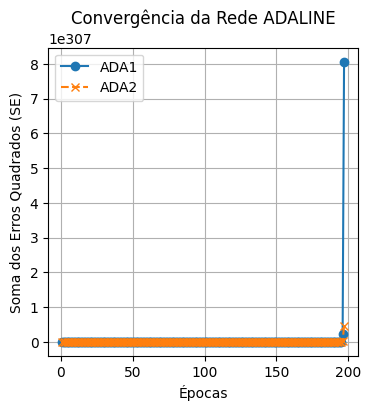

,x1,x2,x3,x4,Predição ADA1,Predição ADA2
0,0.4329,-1.3719,0.7022,-0.8535,A,A
1,0.3024,0.2286,0.8630,2.7909,A,A
2,0.1349,-0.6445,1.0530,0.5687,A,A
3,0.3374,-1.7163,0.3670,-0.6283,A,A
4,1.1434,-0.0485,0.6637,1.2606,A,A
5,1.3749,-0.5071,0.4464,1.3009,A,A
6,0.7221,-0.7587,0.7681,-0.5592,A,A
7,0.4403,-0.8072,0.5154,-0.3129,A,A
8,-0.5231,0.3548,0.2538,1.5776,A,A
9,0.3255,-2.0000,0.7112,-1.1209,A,A


In [13]:
# **a. Execute 2 treinamentos para a rede ADALINE inicializando o vetor de pesos em cada treinamento com valores aleatórios entre zero e um de tal forma que os elementos do vetor de pesos iniciais não sejam os mesmos.**  

import numpy as np
import pandas as pd

data_sistema = np.loadtxt('tab_treinamento2.dat')

df = pd.DataFrame(data_sistema)
X = df.iloc[:, 0:4].values  # Entradas
y = df.iloc[:, 4].values  # Saídas

# Padronização dos dados
# Normalização das características de entrada usando o método Z-score
mean = X.mean(axis=0)
std = X.std(axis=0)
X_std = (X - mean) / std

# Modelo ADALINE
class AdalineGD:
    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y, reinitialize_weights=True):
        if reinitialize_weights:
            self.w_ = np.random.rand(1 + X.shape[1])
            #print(f"pesos {self.w_}")
            self.initial_weights_ = np.copy(self.w_)
        self.cost_ = []
        
        for i in range(self.epochs):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return self.net_input(X)

    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)

# Treinamento
###############
eta = 0.1
epochs = 6000

# Primeiro treinamento
ada1 = AdalineGD(eta, epochs)
ada1.train(X_std, y)

# Segundo treinamento
ada2 = AdalineGD(eta, epochs)
ada2.train(X_std, y)

## Acurácia
def accuracy(y_true, y_pred):
    correct = np.sum(y_true == y_pred)
    total = len(y_true)
    return correct / total

# Para modelo ada1
predictions_ada1 = ada1.predict(X_std)
accuracy_ada1 = accuracy(y, predictions_ada1)

# Para modelo ada2
predictions_ada2 = ada2.predict(X_std)
accuracy_ada2 = accuracy(y, predictions_ada2)

print(f"Acurácia do modelo ada1: {accuracy_ada1 * 100:.2f}%")
print(f"Acurácia do modelo ada2: {accuracy_ada2 * 100:.2f}%")

# Convergência (Através do Custo)
# A convergência do modelo pode ser visualizada examinando a diminuição do custo durante cada época. Se o modelo estiver aprendendo corretamente, o custo deve diminuir à medida que as épocas avançam.
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))

# Plotando o custo para ada1
plt.plot(range(1, len(ada1.cost_) + 1), ada1.cost_, marker='o', label='ADA1')

# Plotando o custo para ada2
plt.plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='x', label='ADA2', linestyle='--')

plt.xlabel('Épocas')
plt.ylabel('Soma dos Erros Quadrados (SE)')
plt.legend()
plt.title('Convergência da Rede ADALINE')
plt.grid(True)
plt.show()

#**b. Registre os resultados dos 2 treinamentos acima na tabela abaixo:**

# Dados para o primeiro treinamento (ada1)
initial_weights_ada1 = ada1.initial_weights_
final_weights_ada1 = ada1.w_
epochs_ada1 = len(ada1.cost_)

# Dados para o segundo treinamento (ada2)
initial_weights_ada2 = ada2.initial_weights_
final_weights_ada2 = ada2.w_
epochs_ada2 = len(ada2.cost_)

# Inserir os dados no DataFrame
results_df = pd.DataFrame({
    "Treinamento": ["ADA1", "ADA2"],
    "Vetor de Pesos Inicial": [initial_weights_ada1, initial_weights_ada2],
    "Vetor de Pesos Final": [final_weights_ada1, final_weights_ada2],
    "Número de Épocas": [epochs_ada1, epochs_ada2]
})

# Separa o vetor inicial em colunas distintas
weights_initial_df = results_df['Vetor de Pesos Inicial'].apply(pd.Series)
weights_initial_df = weights_initial_df.rename(columns=lambda x: f'Inicial_w{x}')

# Separa o vetor final em colunas distintas
weights_final_df = results_df['Vetor de Pesos Final'].apply(pd.Series)
weights_final_df = weights_final_df.rename(columns=lambda x: f'Final_w{x}')

# Concatena com o dataframe original
results_df = pd.concat([results_df.drop(columns=['Vetor de Pesos Inicial', 'Vetor de Pesos Final']), weights_initial_df, weights_final_df], axis=1)

results_df

# **c. Para os treinamentos realizados, aplique então a rede ADALINE para classificar e informar ao comutador se os sinais seguintes devem ser encaminhados para a válvula A ou B (ver tab_teste2.dat).**

#data_teste = np.loadtxt('tab_teste2.dat')
#X_test = data_teste[:, 0:4]  # sinais de entrada

data_teste = np.loadtxt('tab_treinamento2.dat')
df_teste = pd.DataFrame(data_sistema)
X_test = df_teste.iloc[:, 0:4].values  # Entradas

predictions_ada1 = ada1.predict(X_test)
#print(f"Modelo 1 {predictions_ada1}")
predictions_ada2 = ada2.predict(X_test)
#print(f"Modelo 2 {predictions_ada2}")

results_test_df = pd.DataFrame(X_test, columns=["x1", "x2", "x3", "x4"])
results_test_df["Predição ADA1"] = predictions_ada1
results_test_df["Predição ADA2"] = predictions_ada2

# Convertendo os valores para 'A' e 'B' para melhor visualização
results_test_df["Predição ADA1"] = results_test_df["Predição ADA1"].apply(lambda x: 'A' if x == -1 else 'B')
results_test_df["Predição ADA2"] = results_test_df["Predição ADA2"].apply(lambda x: 'A' if x == -1 else 'B')

results_test_df